In [3]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt


train_data = pd.read_csv('C:\\files\\Documents\\polyu\\courses\\urban_big_data\\final_project\\train.csv')
test_data = pd.read_csv('C:\\files\\Documents\\polyu\\courses\\urban_big_data\\final_project\\test.csv')

In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data['Dates'] = pd.to_datetime(train_data['Dates'])
test_data['Dates'] = pd.to_datetime(test_data['Dates'])
train_data.set_index('Dates', inplace=True)
test_data.set_index('Dates', inplace=True)

train_monthly = train_data.resample('ME').size()
test_monthly = test_data.resample('ME').size()

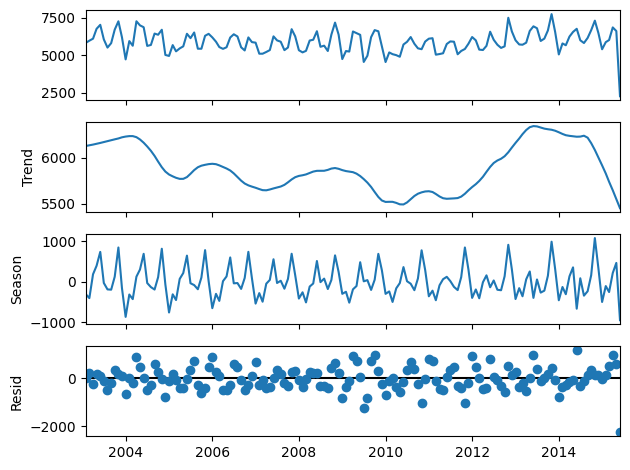

In [6]:
stl = STL(train_monthly, seasonal=13)
result = stl.fit()

fig = result.plot()
import matplotlib.dates as mdatesplt.show()

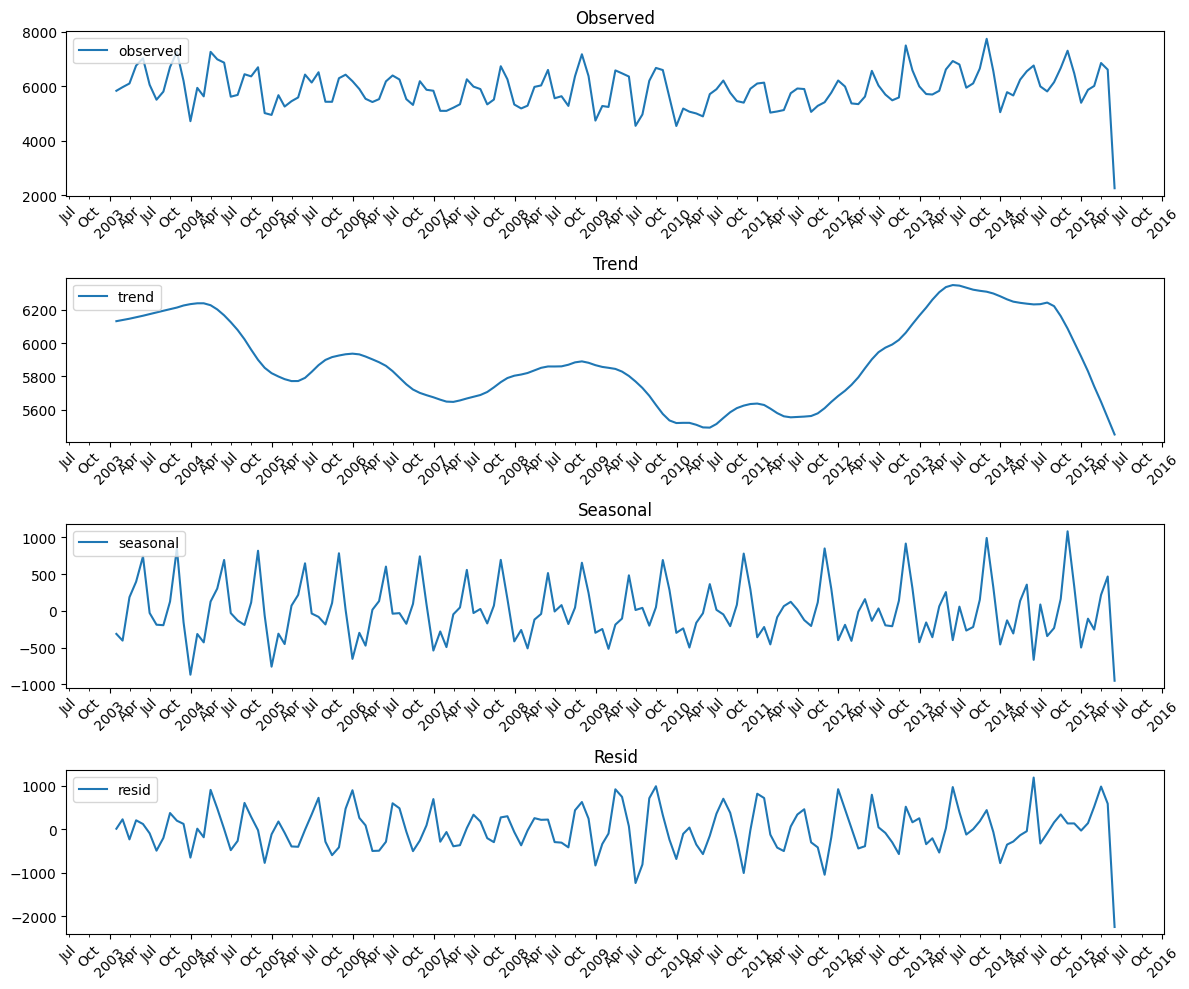

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

stl = STL(train_monthly, seasonal=13)
result = stl.fit()

fig, ax = plt.subplots(4, 1, figsize=(12, 10))  

components = ['observed', 'trend', 'seasonal', 'resid']
for i, comp in enumerate(components):
    ax[i].plot(result.observed.index, getattr(result, comp), label=comp)
    ax[i].set_title(comp.capitalize())
    ax[i].legend(loc='upper left')

    ax[i].xaxis.set_major_locator(mdates.YearLocator())  
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  

    ax[i].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
    ax[i].xaxis.set_minor_formatter(mdates.DateFormatter('%b'))  

    plt.setp(ax[i].xaxis.get_minorticklabels(), rotation=45)
    plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=45)


plt.tight_layout()
plt.show()

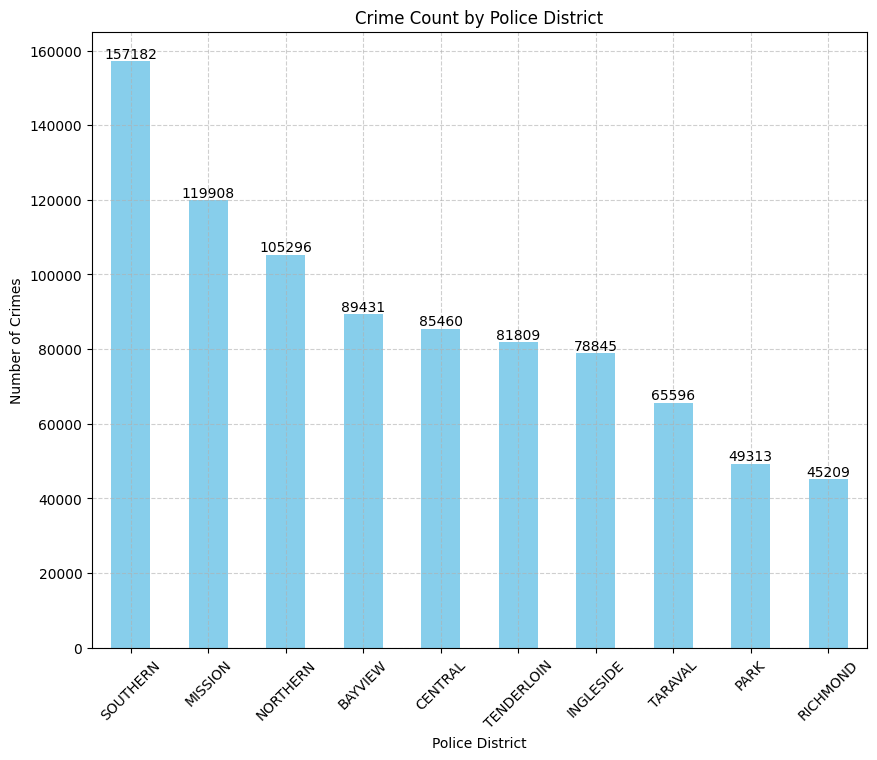

In [27]:
district_crime_counts = train_data['PdDistrict'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
bars = district_crime_counts.plot(kind='bar', color='skyblue')
plt.title('Crime Count by Police District')
plt.xlabel('Police District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

for i, value in enumerate(district_crime_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')  

plt.show()